## Problem 1 (20%)
Imagine you are studying salaries of Data Scientists in Kazakhstan. It is known that the salaries are Normally distributed with a mean of 550k tenge and standard deviation of 65k tenge. Based on that information, answer the following questions: 

1. Find the most frequently paid salary level. Justify your answer.
2. Find the minimum salary level that corresponds among Top 10% salaries of Data Scientists.
3. For a randomly selected data scientist, find the probability of his salary being between 500k and 600k tenge?
4. If we have a sample of 200 data scientiest, how many of them should have salary above 625 tenge? Round your answer to the closest integer.

In [39]:
from scipy import stats
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.stats import norm

stats.norm(loc=550, scale=65)


**Q1.1. Find the most frequently paid salary level. Justify your answer.**

According to the normal distribution properties , the most frequently paid salary is equal to mode . As we know mode is equal to mean , therefore answer will be 550k tenge

$$ MODE=MEAN=MEDIAN$$

**Q1.2.Find the minimum salary level that corresponds among Top 10% salaries of Data Scientists.**

In [53]:
mu,sigma=550,65
top_10=norm.interval(alpha=0.1,loc=mu,scale=sigma)
print('The minimum salary for top 10% :', round(top_10[0],5))

The minimum salary for top 10% : 541.83201


**Q1.3.For a randomly selected data scientist, find the probability of his salary being between 500k and 600k tenge?**

In [37]:
# Q1.3. to find the probability BETWEEN 2 variables:
task3 = stats.norm(loc=550,scale=65).cdf(600) - stats.norm(loc=550,scale=65).cdf(500)
print(" Probability for between 400 & 500  KZT : ",np.round(task4, 3))

 Probability for between 400 & 500  KZT :  0.789


**Q1.4.If we have a sample of 200 data scientiest, how many of them should have salary above 625 tenge? Round your answer to the closest integer.**

In [55]:
import math
scale=65/(math.sqrt(200))
abov_625=norm.sf(x=625,loc=550,scale=scale)
print(" Probability for 200 people , with salary above than 625 : ",round(abov_625))

 Probability for 200 people , with salary above than 625 :  0


## Problem 2 (20%)
Imagine you are studying student average daily spending. You have sample for that data (sample_2 below).
Tasks to do:
1. Based on this sample countruct 95% confidence interval for population mean of student daily spending. Describe steps that you do and provide assumptions if you made any. 
2. Is there an evidence that average daily spending of students is lower than 40 USD per day?

In [58]:
# Note that data is provided in USD. 
import numpy as np
import scipy.stats as st 
from scipy.stats import t
sample_2 = [45, 25, 30, 35, 28, 41, 56, 38, 42, 25, 37, 23, 42, 50, 28, 34, 43, 30, 26, 22, 29, 32, 30, 44, 49]


**Q1.1.Based on this sample countruct 95% confidence interval for population mean of student daily spending. Describe steps that you do and provide assumptions if you made any.**

In [57]:
len(sample_2)

25

**Because size of sample is equal to 25 , which is less than 30 , we're capable to use here t-interval for more accurate calculations instead of normal distribution**.

In [56]:
# ci_95 = stats.norm.interval(alpha=0.95, loc=np.mean(sample_2), scale=np.std(sample_2)/np.sqrt(len(sample_2)))

ci_95_t = t.interval(alpha=0.95, df=len(sample_2)-1, loc=np.mean(sample_2), scale=st.sem(sample_2))


# print('Lower bound:', round(ci_95[0], 3))
# print('Upper bound:', round(ci_95[1], 3))


print('Lower bound using t interval:', round(ci_95_t[0], 3))
print('Upper bound using t interval:', round(ci_95_t[1], 3))

Lower bound using t interval: 31.532
Upper bound using t interval: 39.188


**Q2.2.Is there an evidence that average daily spending of students is lower than 40 USD per day?**

It can be seen that, 40 does not fall into our 95% confidence interval of mean GPA for SE. Moreover, 40 is located to the right of that interval, which means that if we take a lot of samples of salaries, we will expect that 95% of them will have sample mean higher than 40. 

## Problem 3 (30%)
Imagine you are studying GPA of students at AITU. You get a sample of 40 students, and obtained sample mean of 3.3 and sample standard deviation 0.35. 
1. Construct 95% and 99% confidence intervals for mean GPA. 
2. Show the width of each interval. Explain how different factors affect to the width of the interval.
2. For 99% confidence interval, how many more observations should be added to the sample, so that confidence interval for μ was within 0.1 unit?

**Q1.1.Construct 95% and 99% confidence intervals for mean GPA.**

array([2.83346516, 3.12607821, 3.54280656, 3.20287889, 3.92216149,
       3.2725786 , 3.20691407, 2.88704641, 3.16934497, 3.3379173 ,
       3.4976349 , 3.81408371, 3.15827638, 4.16301823, 3.17293237,
       3.23267571, 2.74605225, 2.76575951, 3.43313391, 3.16191373,
       3.17818618, 3.15130319, 2.99918652, 3.14491578, 3.33159856,
       3.1629114 , 3.41769711, 3.54207431, 3.22026595, 3.00900669,
       2.69982908, 3.27215952, 3.87465803, 3.59158572, 2.88823087,
       3.14297031, 3.27037118, 3.11425813, 3.10086142, 3.19363165])

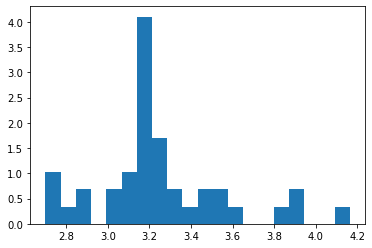

In [74]:

n = 40
mu, sigma = 3.3, 0.35
s = np.random.normal(mu, sigma, n)
plt.hist(x=s, bins=20, density=True);

s

**95% confidence interval** 

In [84]:
s_mean = np.mean(s) 
s_std = np.std(s, ddof=1)
size_s = len(s)

s_95 = stats.norm.interval(alpha=0.95, loc=s_mean, scale=s_std/np.sqrt(size_s))
print('Lower bound:', round(s_95[0], 3))
print('Upper bound:', round(s_95[1], 3))
print('ci_95:', s_95)

Lower bound: 3.151
Upper bound: 3.347
ci_95: (3.15072894762338, 3.3468897518870127)


**99% confidence interval** 

In [83]:
s_99 = stats.norm.interval(alpha=0.99, loc=s_mean, scale=s_std/np.sqrt(size_s))
print('Lower bound:', round(s_99[0], 3))
print('Upper bound:', round(s_99[1], 3))

print('ci_99:', s_99)

Lower bound: 3.12
Upper bound: 3.378
ci_99: (3.119909851648205, 3.3777088478621877)


**Q3.2.Show the width of each interval. Explain how different factors affect to the width of the interval.**

The width of the confidence interval for an individual study depends to a large extent on the sample size. Larger studies tend to give more precise estimates of effects (and hence have narrower confidence intervals) than smaller studies.

To get higher confidence, we need to make the interval wider interval. This is evident in the multiplier, which increases with confidence level. b) If you increase sample size, the width of confidence intervals will increase.

In [72]:
ci_width_95=s_95[1]-s_95[0]
ci_width_95

0.20261338104240156

In [73]:
ci_width_99=s_99[1]-s_99[0]
ci_width_99

0.2629295633393003

**Q3.3.For 99% confidence interval, how many more observations should be added to the sample, so that confidence interval for μ was within 0.1 unit?**

C:\Program Files\Python\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


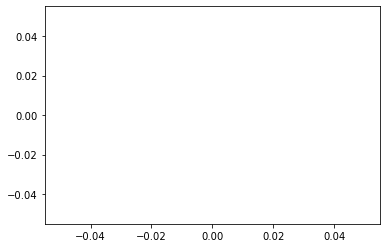

In [89]:
n2 = ci_width_99/2
mu, sigma = 3.3, 0.35
s1 = np.random.normal(mu, sigma, round(n2))
plt.hist(x=s1, bins=20, density=True);


## Problem 4 (30%)
Imagine you are studying performance of school graduates at ENT and you have data for two different schools (KTL and NIS). Data provided below. Tasks to do:
1. Test the hypothesis that the average ENT score is more than 100 for KTL. Use both critical region approach and P-value approach.
2. Test the hypothesis that two schools had similar performance on ENT. Use only one of the two approaches.

State the hypothesis, and then perform the test. Choose correct procedure of choosing significance levels. Derive proper conclusion in the context of the problem.

In [59]:
data_ktl = [88, 91, 86, 92, 90, 93, 95, 78, 87, 98, 82,  117, 138, 97,
            120, 119, 108, 103, 121, 139, 88, 95, 106, 110, 123, 90,
           129, 102, 136, 119, 121, 114, 122, 103, 81, 75,  133, 119,
           105, 125, 103, 97, 126, 118, 104, 112, 100, 92, 121]
len(data_ktl)

49

In [60]:
data_nis = [72, 93, 95, 117, 94, 97, 103, 97, 80, 103, 84, 88, 
            120, 119, 108,  92, 82, 88, 95, 106, 110, 99, 90, 
            77, 102, 78, 87, 98, 82, 119, 72, 84, 103, 81, 75,   
            105, 78,  104, 100, 92, 99, 91, 86, 100]
len(data_nis)

44

$$ H_0: \mu \geq 100$$ 
$$ H_1: \mu < 100$$ 

In [ ]:
list_diff = [(data_ktl[i] - data_[i]) for i in range(len(list_after))]
print(list_diff)

---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   20/20    |     
| 2       |   20/20 | 
| 3       |   30/30    |     
| 4       |   30/30 | 
|**Total**|**100/100**  | 
